# Machine Learning Tutorial 
## Introduction to Machine Learning for Materials Science

Based on the Review paper: Schleder et al 2019 J. Phys. Mater. https://doi.org/10.1088/2515-7639/ab084b
(From DFT to Machine Learning: recent approaches to Materials Science – a review)

Authors: Gabriel R Schleder, Antonio C M Padilha, Carlos M Acosta, Marcio Costa, Adalberto Fazzio

Code examples gathered from multiple sources, mostly scikit-learn online manual

#### Requirements
We will use Python and common libraries for open and state-of-art research 

* [Python](https://www.python.org/) 
* Numerical package [NumPy](http://www.numpy.org/) 
* Scientific package [Scipy](https://www.scipy.org/) 
* Plotting package [Matplotlib](https://matplotlib.org/)
* Pandas
* Scikit-learn
* ASE

In [1]:
%load_ext watermark
%watermark -a 'Version of libraries used:' -v -p numpy,matplotlib,sklearn,ase

Version of libraries used: 

CPython 3.6.2
IPython 6.1.0

numpy 1.15.2
matplotlib 3.0.0
sklearn 0.19.1
ase 3.16.2


# Lets demonstrate the main types of machine learning problems with common algorithms
(for running commands hit shift + enter)

### - The first requirement to machine learning is the availability of data (Step 1)


![Materials Informatics Cycle](./MI_cycle.png "Materials Informatics Cycle")

### - In a real case scenario, with the data in hand, one should also know what kind of problem one is trying to solve (Step 0 above)
![Machine Learning Cheatsheet](./cheatsheet.png "Machine Learning Cheatsheet")

#### We will show some simple examples of each kind of problem, with some classic datasets

# 1 - Dimensionality Reduction

In unsupervised learning, we want to explore our dataset to uncover if they present patterns and correlations in the data structure

We will load the classic "Iris" dataset composed of 4 measured features (properties) for plant examples

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
print('The measured properties are:')
print(iris.feature_names)
print('The first five examples have the values:')
print(X[:5])

#ADD the 4x4 pairplot 

The measured properties are:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The first five examples have the values:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Now we just visualize the data: first we compare two features agains each other

<IPython.core.display.Javascript object>


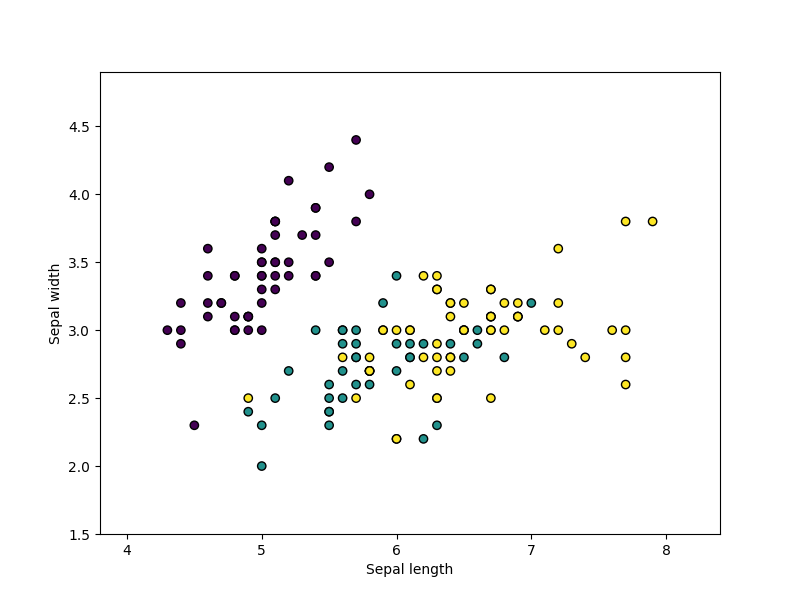

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn import datasets

fig, ax1 = plt.subplots(figsize=(8, 6))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

#plt.clf()

# Plot the training points
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis',
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.xticks(())
#plt.yticks(())

plt.show()

And now we compare each of the 4 features, and inspect the correlations between them

<IPython.core.display.Javascript object>


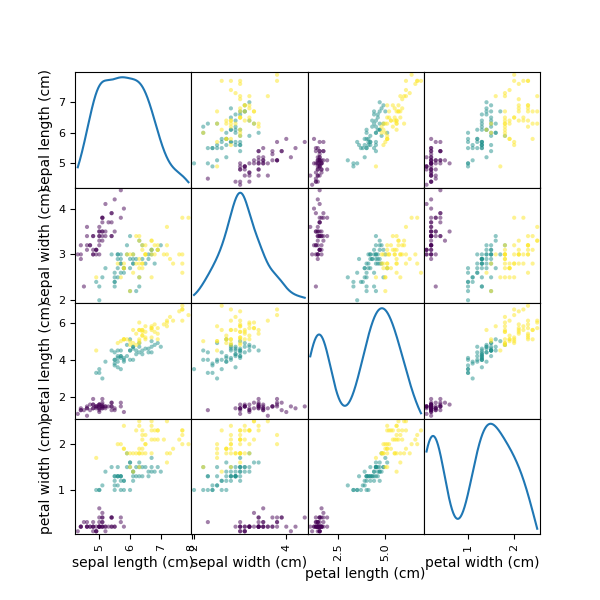

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5dbc125cf8>,
      dtype=object)

In [4]:
import pandas as pd
from pandas.plotting import scatter_matrix
dataset = pd.DataFrame(X,columns=iris.feature_names)
scatter_matrix(dataset, alpha=0.5, figsize=(6, 6), diagonal='kde',c=iris.target)

<IPython.core.display.Javascript object>


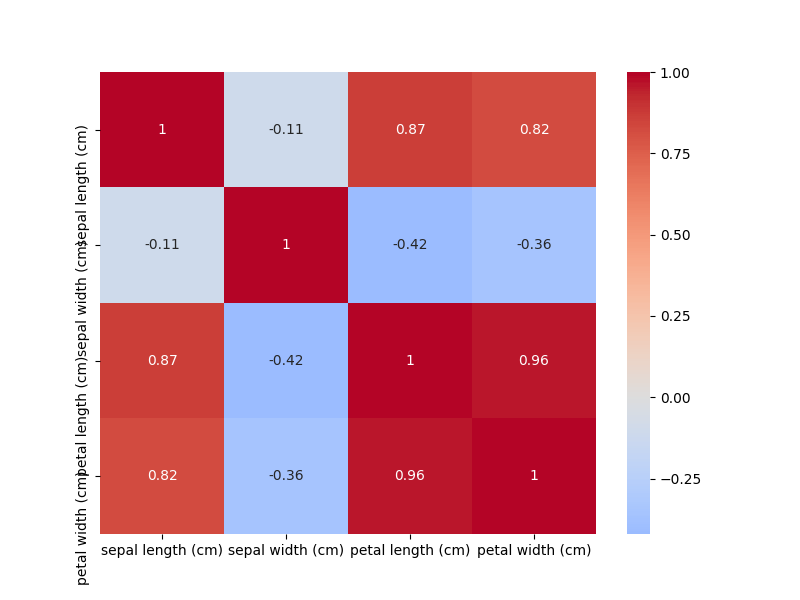

In [5]:
fig=plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm',center=0)

If we want to visualize the N-dimensional (in this case 4) data, we can perform a dimensionality reduction technique such as PCA and use the first 2 or 3 eigenvectors, which will describe the most variance in the data

Besides, the first PCA eigenvectors can also be used as input for the subsequent machine learning tasks.

<IPython.core.display.Javascript object>


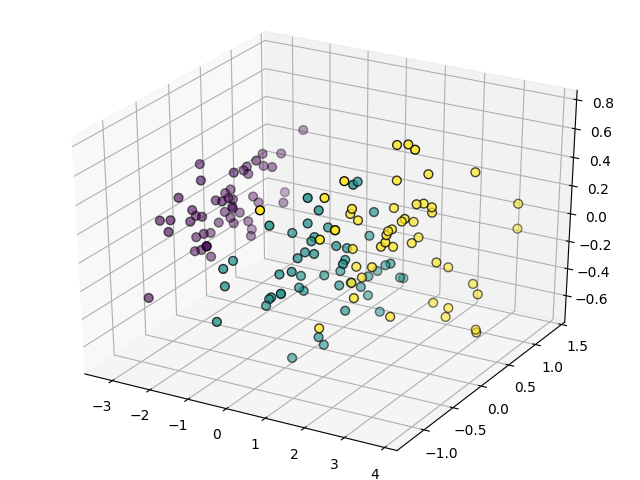

<IPython.core.display.Javascript object>


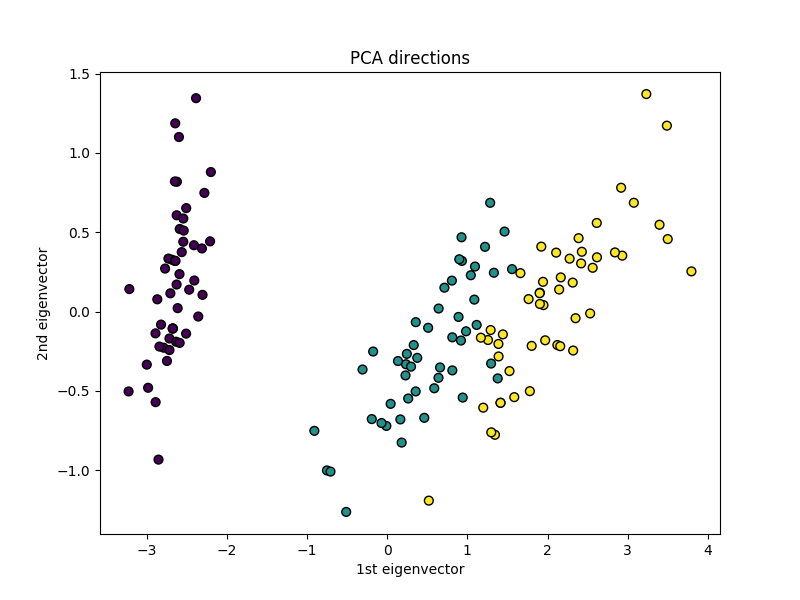

Text(0, 0.5, '2nd eigenvector')

In [6]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
#ax.show()
ax3=plt.figure()
ax = Axes3D(ax3)
X_reduced2 = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced2[:, 0], X_reduced2[:, 1], X_reduced2[:, 2], c=y,
           cmap='viridis', edgecolor='k', s=40)
#ax2.set_title("PCA directions")
#ax2.set_xlabel("1st eigenvector")
#ax.w_xaxis.set_ticklabels([])
#ax2.set_ylabel("2nd eigenvector")
#ax2.set_ylabel("3rd eigenvector")


#fig = plt.figure(1, figsize=(8, 6))
fig,(ax1) = plt.subplots(figsize=(8, 6))
#ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=2).fit_transform(iris.data)
ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='viridis', edgecolor='k', s=40)
ax1.set_title("PCA directions")
ax1.set_xlabel("1st eigenvector")
#ax.w_xaxis.set_ticklabels([])
ax1.set_ylabel("2nd eigenvector")
#ax.w_yaxis.set_ticklabels([])
#ax.set_zlabel("3rd eigenvector")
#ax.w_zaxis.set_ticklabels([])



# 2 - Clustering

Now assuming we do not know if the examples come from a single or different classes, we can try to cluster our data into groups

We show an example of a common algorithm: k-means

<IPython.core.display.Javascript object>


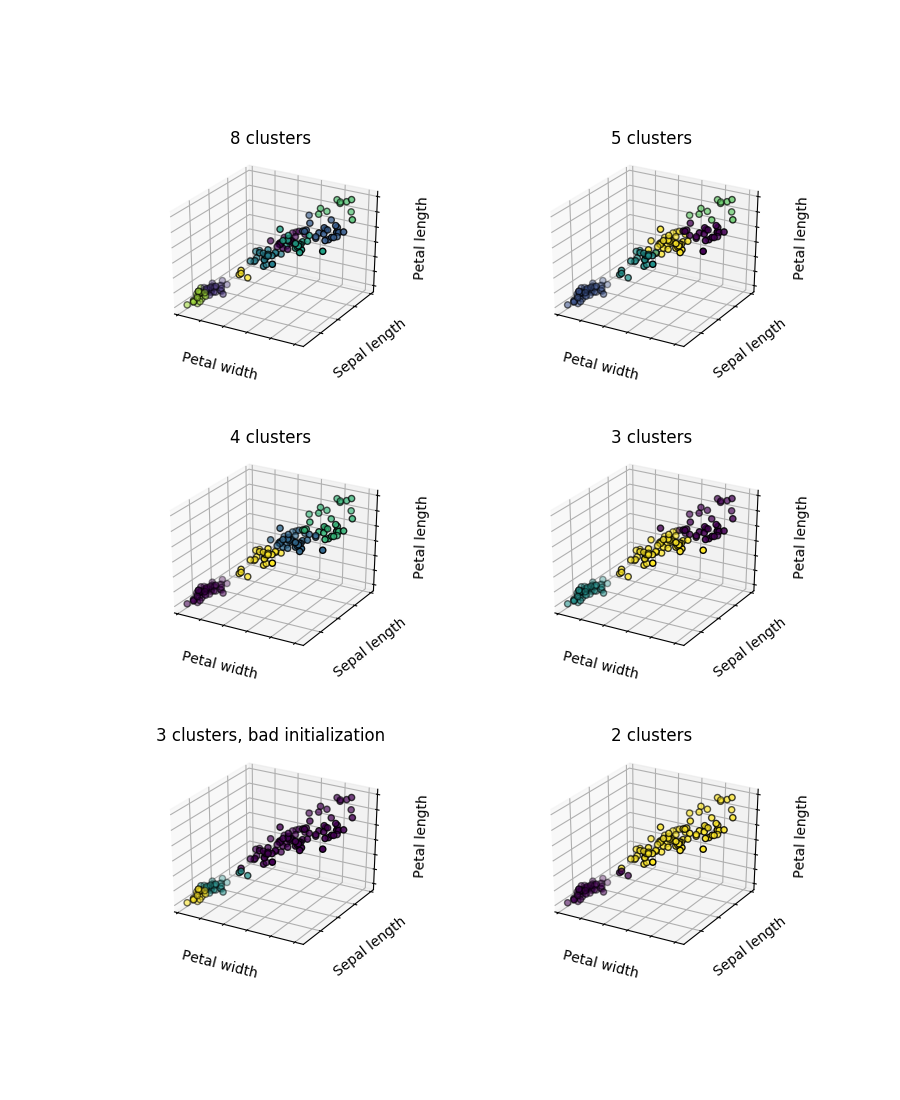

In [7]:
from sklearn.cluster import KMeans
from sklearn import datasets

X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=5)),
              ('k_means_iris_3', KMeans(n_clusters=4)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random')),
              ('k_means_iris_3', KMeans(n_clusters=2))]

fignum = 0
titles = ['8 clusters', '5 clusters', '4 clusters', '3 clusters', '3 clusters, bad initialization','2 clusters']
fig= plt.figure(figsize=(9, 11))
for name, est in estimators:
    
    ax = fig.add_subplot(3,2,fignum+1, projection='3d')
    est.fit(X)
    labels = est.labels_
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum])
    ax.dist = 12
    fignum = fignum + 1

In [8]:
#Elbow - criterion: error x k
#sse[k] = kmeans.inertia_
# Inertia: Sum of distances of samples to their closest cluster center
#plt.figure()
#plt.plot(list(sse.keys()), list(sse.values()))
#plt.xlabel("Number of cluster")
#plt.ylabel("SSE")

<IPython.core.display.Javascript object>


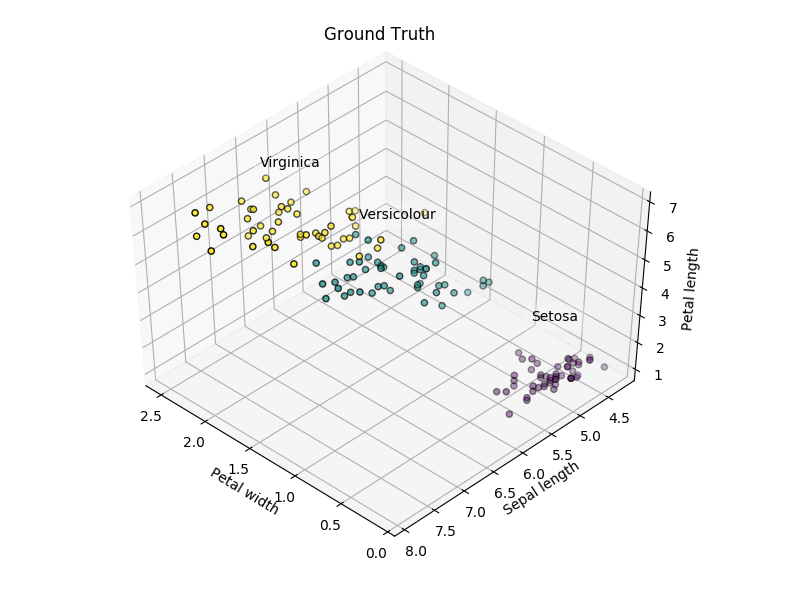

In [9]:
# Plot the ground truth
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

#ax.w_xaxis.set_ticklabels([])
#ax.w_yaxis.set_ticklabels([])
#ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

## 3 - Classification

Now, for problems where the objective is to to classify unknown samples based on knowledge of known data examples

We can use different classification algorithms such as Logistic Regression (LR), K-Nearest Neighbors (KNN), Classification and Regression Trees (CART), Gaussian Naive Bayes (NB), Support Vector Machines (SVM), etc.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

X = iris.data
y = iris.target

# We split the dataset into train and test sets, for making predictions on unseen exaples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.72      0.84        18
          2       0.69      1.00      0.81        11

avg / total       0.92      0.89      0.89        45

[[16  0  0]
 [ 0 13  5]
 [ 0  0 11]]
accuracy is 0.8888888888888888


<IPython.core.display.Javascript object>


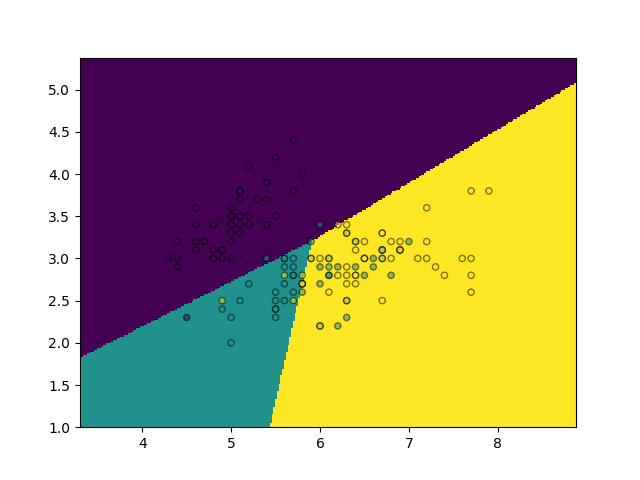

(1.0, 5.380000000000004)

In [11]:
# We only take the first two features. We could avoid this ugly
# slicing by using a 2D dataset
X = iris.data[:, :2]
y = iris.target
Model = LogisticRegression()
Model.fit(X, y)

# Now we plot onto a 2D grid
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = Model.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig=plt.figure()
plt.pcolormesh(xx, yy, Z, cmap='viridis')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis',
            edgecolor='k', s=20,alpha=0.5)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

### CART: Classification and Regression Trees

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Model = DecisionTreeClassifier(criterion = "gini", max_depth = 3)
m=Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy is 0.9777777777777777


<IPython.core.display.Javascript object>


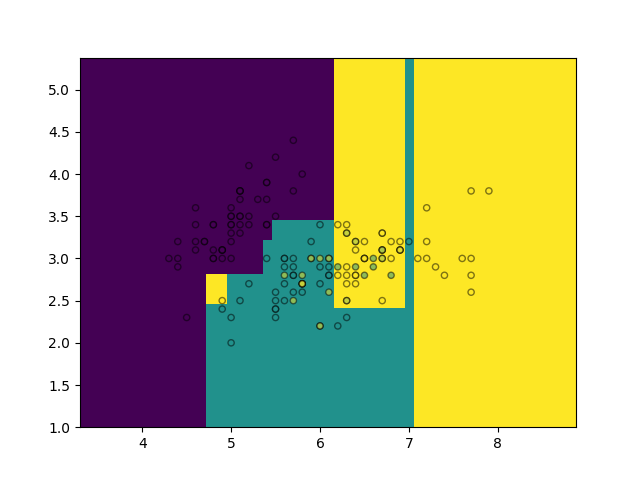

(1.0, 5.380000000000004)

In [13]:
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
Model = DecisionTreeClassifier(criterion = "gini", max_depth = 5)
Model.fit(X, y)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = Model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig=plt.figure()
plt.pcolormesh(xx, yy, Z, cmap='viridis')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis',
            edgecolor='k', s=20,alpha=0.5)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

### kNN: k Nearest Neighbors

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Model = KNeighborsClassifier(n_neighbors=15, weights='uniform')
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy is 0.9777777777777777


<IPython.core.display.Javascript object>


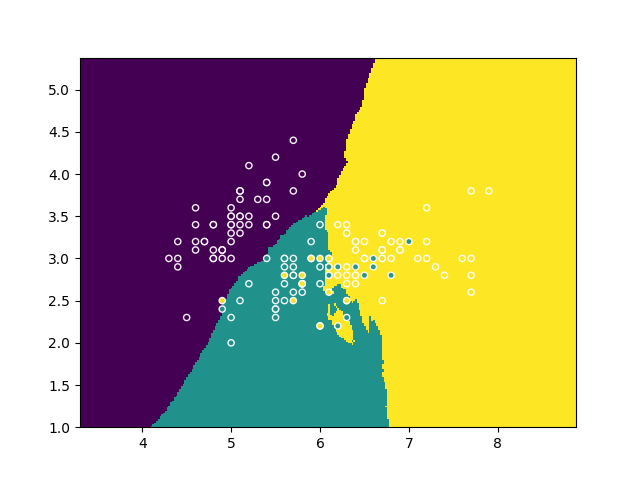

(1.0, 5.380000000000004)

In [15]:
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
Model = KNeighborsClassifier(n_neighbors=25, weights='uniform')
Model.fit(X, y)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = Model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig=plt.figure()
plt.pcolormesh(xx, yy, Z, cmap='viridis')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis',
            edgecolor='white', s=20,alpha=0.95)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

### - Artificial/Deep Neural Networks

In [16]:
from sklearn.neural_network import MLPClassifier
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Model=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 3), random_state=1)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy is  0.9777777777777777


<IPython.core.display.Javascript object>


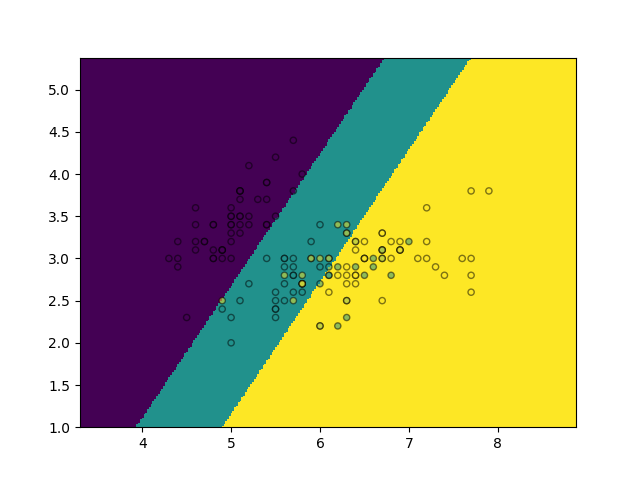

(1.0, 5.380000000000004)

In [17]:
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
Model=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(2, 2), random_state=1)
Model.fit(X, y)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = Model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig=plt.figure()
plt.pcolormesh(xx, yy, Z, cmap='viridis')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis',
            edgecolor='k', s=20,alpha=0.5)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

## 4 - Regression

Finally, if we want to predict a numerical value, the type of learning problem is regression

We will use a different dataset

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

We will learn the disease progression using as feature only the body mass index (BMI)

The algorithm is a linear ridge regression, with a penalization parameter alpha

Coefficients: 
 [938.2280439]
Root Mean squared error: 50.48
Variance score: 0.47


<IPython.core.display.Javascript object>


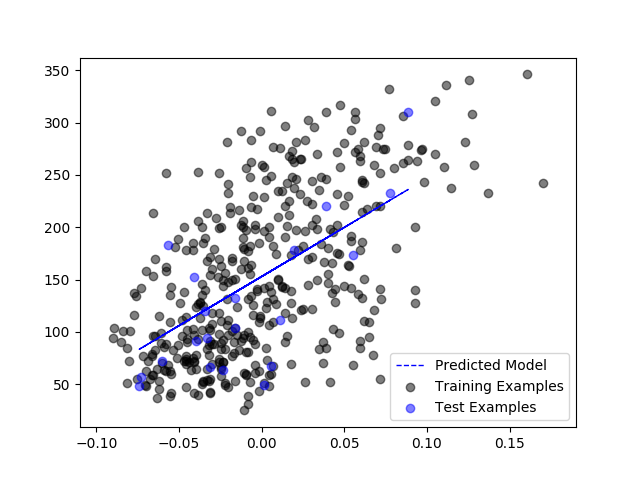

In [19]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data and targets into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear ridge regression object
#regr = linear_model.LinearRegression()
regr = linear_model.Ridge(alpha=0.00001, random_state=0)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The root mean squared error
print("Root Mean squared error: %.2f"
      % math.sqrt(mean_squared_error(diabetes_y_test, diabetes_y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
fig=plt.figure()
#Training data
plt.scatter(diabetes_X_train, diabetes_y_train, color='black', alpha=0.5, label='Training Examples')
#Test data
plt.scatter(diabetes_X_test, diabetes_y_test, color='b', alpha=0.5, label='Test Examples')
#ML model prediction
plt.plot(diabetes_X_test, diabetes_y_pred, '--', color='blue', linewidth=1, label='Predicted Model')

plt.legend()
plt.show()